### Imports

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from KNN import KNN
from linear_regression import LR
from logistic_regression import LogR

##  Supervised
### Classification
KNN and Logistic Regression

### Regression
Linear Regression

### Create training data for KNN:

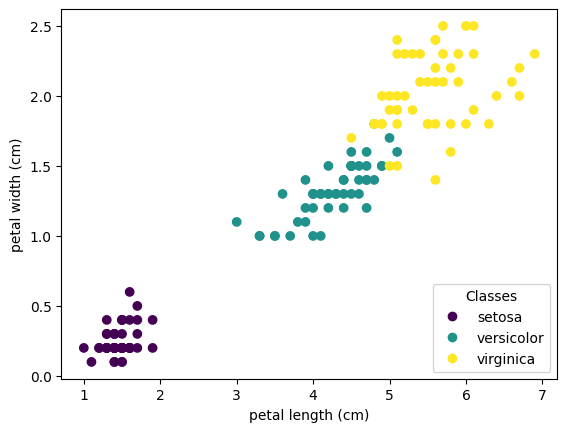

In [5]:
# Dataset of flowers
# X - Data i's petal length, petal width, etc... - 2D array
# y - Data i's group (species) - array
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 2], X[:, 3], c=y)
ax.set(xlabel = iris.feature_names[2], ylabel = iris.feature_names[3])
fig = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

### Run KNN's prediction

It uses proximity (from other trained points) to classify a data point. K value determines how many closest points to take in consideration. (Use an odd number to prevent ties)

1. Find the k closest points using any distance formula (Like Euclidean)
2. Choose the label/group that showed up the most

In [6]:
knn = KNN(5)

knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)

accuracy = np.mean(y_preds == y_test)
print(f"Accuracy {accuracy * 100}%")

Accuracy 96.66666666666667%


### Setup Linear Regression Data

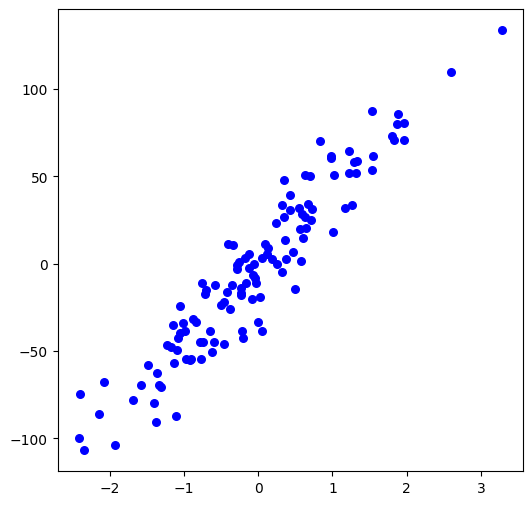

In [33]:
X, y = datasets.make_regression(n_samples=120, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

fig = plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

### Using Linear Regression:

y - label; predicted value

x - feature; the input

- Mean squared error (MSE) is the sum of the squared difference between the predicted and actual values. The goal is to minimize the error/loss. (Larger errors are emphasized more than small errors because of the squaring); 

1. Find weight (w) and bias (b) such that y = wx + b (or y = b + w<sub>1</sub>x<sub>1</sub> + ... + w<sub>n</sub>x<sub>n</sub>)

2. Use gradient descent to find the lowest MSE. Steps:

3. Find the MSE 

4. Find the derivatives with respect to the weight and another with respect to the bias.

5. w = w - slope * learning rate

6. b = b - slope * learning rate

7. Repeat step 1 until MSE doesn't change as much anymore.
 

### Hyperparameters

Variables that affects the different aspects of training. 

1. Learning rate - how much weight and bias is adjusted per iteration.
2. Batch size - How many examples are considered before updating weight/bias (containing a label and features)
3. Epochs - One epoch means the model has processed all examples in the dataset once.

Weights: [43.48202922]
Bias: -2.23841174175897


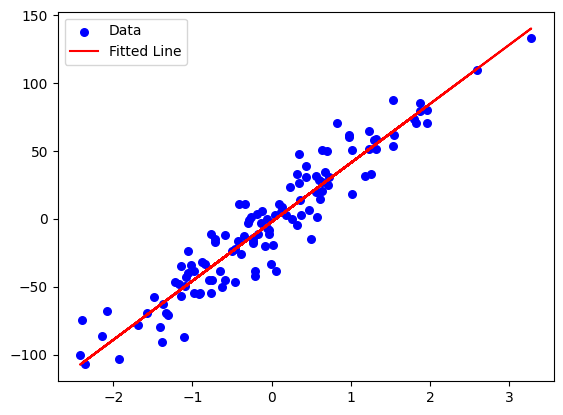

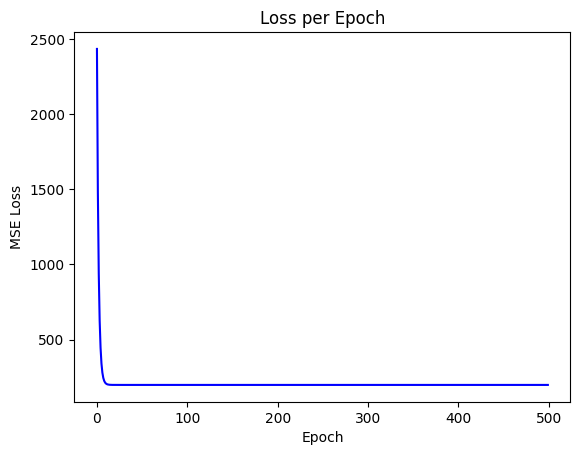

In [34]:
lr = LR(0.1, 500)

lr.fit(X_train, y_train)

print("Weights:", lr.weights)
print("Bias:", lr.bias)

plt.scatter(X[:, 0], y, color = "b", s = 30, label="Data")
plt.plot(X[:, 0], lr.predict(X), color="r", label="Fitted Line")
plt.legend()
plt.show()

plt.plot(lr.get_losses(), color="b")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

### Setup Logistic Regression Data

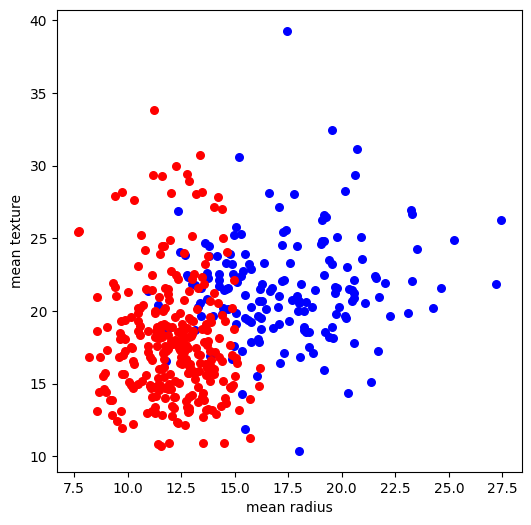

In [48]:
bc_data = datasets.load_breast_cancer()
X, y = bc_data.data, bc_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

fig = plt.figure(figsize=(6, 6))
plt.scatter(X_train[y_train.flatten() == 0][:, 0], X_train[y_train.flatten() == 0][:, 1], color = "b", s = 30)
plt.scatter(X_train[y_train.flatten() == 1][:, 0], X_train[y_train.flatten() == 1][:, 1], color = "r", s = 30)
plt.xlabel(bc_data.feature_names[0])
plt.ylabel(bc_data.feature_names[1])
plt.show()

### Using Logistic Regression

Similar to linear regression, you use gradient descent to find a possibility function.

However, this is used for classification. It finds a sigmoid function (which returns a value between 0 and 1). That value is the probability the data is true, spam, etc...

You would use a different loss function called log loss. (Instead of squared loss, it finds the logarithm of the change in loss). It is used because of the asympotic nature of the function, the output would require a lot of storage for decimal precision:

5 -> 0.98

10 -> 0.99998

Accuracy 92.11%


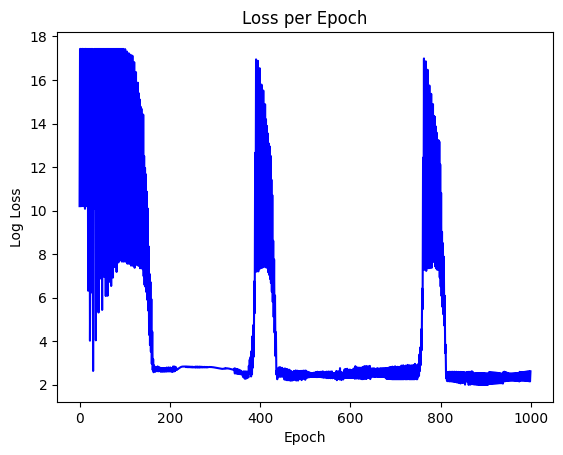

In [51]:
logr = LogR(0.01, 1000)

logr.fit(X_train, y_train)

y_preds = [logr.predict(X) for X in X_test]
acc = np.sum(y_preds == y_test)/len(y_test)

print(f"Accuracy {acc * 100:.2f}%")

plt.plot(logr.get_losses(), color="b")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.show()